# Part 1: Low Level Vision (image > image)
> ## Week 1 ( Basic Image Processing Techniques)¶
>> **08- Template Matching (find object in an image)**

This is the curriculum for "Learn Computer Vision" by Siraj Raval on Youtube
https://github.com/llSourcell/Learn_Computer_Vision

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

## Template matching

## 1. Template matching for single object
Below example shows template matching of **`template(Messi's face)`** on **`source image(full image)`**

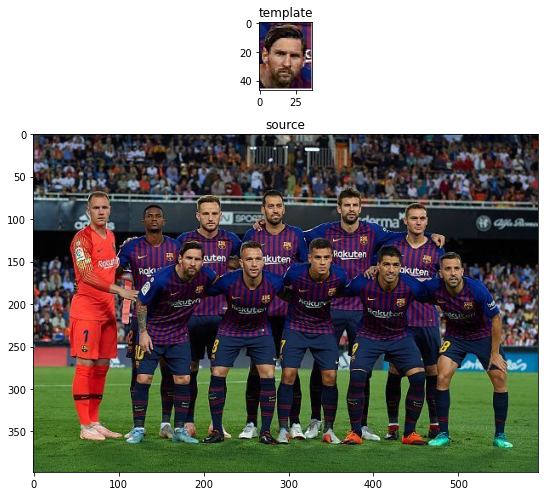

In [2]:
# read the images
template = cv2.imread("messi.png")
source = cv2.imread("fc_barca.jpg")

f, (ax1,ax2) = plt.subplots(2,1, figsize=(10,7), 
                            gridspec_kw={'height_ratios': [1,5]})
ax1.imshow(cv2.cvtColor(template, cv2.COLOR_BGR2RGB))
ax1.title.set_text("template")
ax2.imshow(cv2.cvtColor(source, cv2.COLOR_BGR2RGB))
ax2.title.set_text("source")
f.tight_layout()

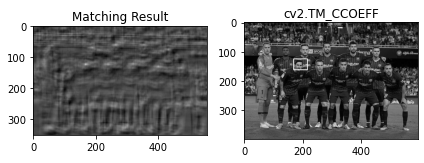

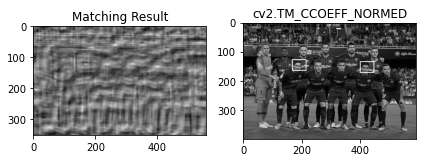

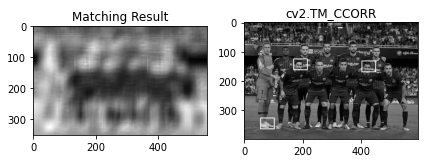

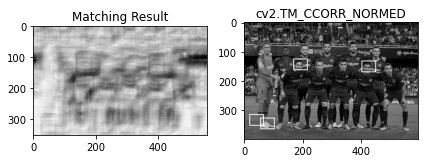

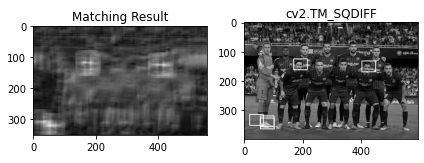

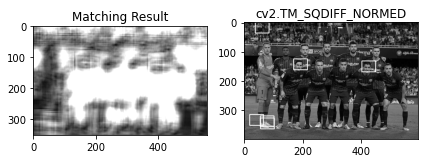

In [3]:
# We will try all the comparison methods so that we can see 
# how their results look like

# read the images
template = cv2.imread("messi.png")
source = cv2.imread("fc_barca.jpg")

# convert into grayscale
template_gray = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)
source_gray = cv2.cvtColor(source, cv2.COLOR_BGR2GRAY)

w,h = template_gray.shape

# All the 6 methods for comparison in a list
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
           'cv2.TM_CCORR_NORMED','cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']


for meth in methods:
    # cv2.matchTemplate slides through image, compares the overlapped 
    # patches of size wxh against template using the specified 
    # method and stores the comparison results.
    # cv2.matchTemplate (image, templ, method)
    res = cv2.matchTemplate(source_gray, template_gray, eval(meth))
    
    # cv2.minMaxLoc finds the minimum and maximum element values and their positions.
    # The extremums are searched across the whole array
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    
    # if the method is TM_SQDIFF or TM_SQDIFF_NORMED, take min
    if meth in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    
    bottom_right = (top_left[0]+w, top_left[1]+h)
    
    # cv2.rectangle(img, pt1, pt2, color, thickness)
    # pt1 Vertex of the rectangle, pt2 Vertex of the rectangle opposite to pt1 
    cv2.rectangle(source_gray, top_left, bottom_right, 255, 2)
    
    # plot
    plt.subplot(121, title='Matching Result')
    plt.imshow(res, cmap='gray')
    plt.subplot(122, title=meth)
    plt.imshow(source_gray, cmap='gray')
    plt.tight_layout()
    plt.show()

> As you can clearly see **`cv2.TM_CCOEFF`** method performed better than others in this situation

## 2. Template matchig for multiple objects

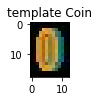

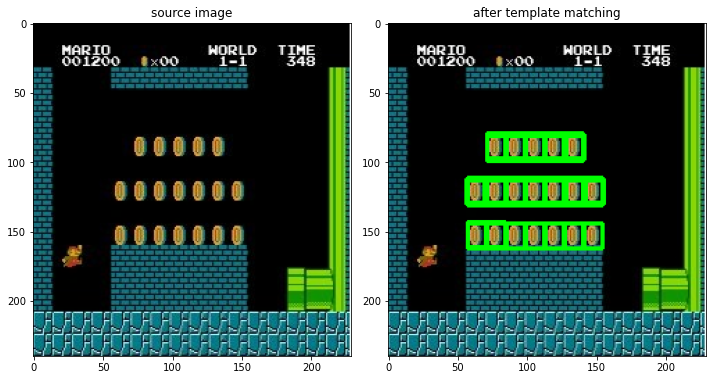

In [4]:
# in case of multiple objects(with same scale), we will first 
# threshold the results and then loop over to draw rectangles.

img = cv2.imread('mario_coins.jpg')
img_rgb = img.copy()
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
template = cv2.imread('mario_single_coin.png')
template_gray = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)
w, h = template_gray.shape[::-1]

res = cv2.matchTemplate(img_gray,template_gray,cv2.TM_CCOEFF_NORMED)
threshold = 0.8
loc = np.where( res >= threshold)
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,255,0), 2)


# plot it
plt.figure(figsize=(1,1))
plt.title("template Coin")
plt.imshow(cv2.cvtColor(template, cv2.COLOR_BGR2RGB))
plt.show()

f, (ax1, ax2) = plt.subplots(1,2, figsize=(10,7))
ax1.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax1.title.set_text("source image")
ax2.imshow(cv2.cvtColor(img_rgb, cv2.COLOR_BGR2RGB))
ax2.title.set_text("after template matching")
f.tight_layout()
plt.show()

## references:
- https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_template_matching/py_template_matching.html
- https://www.pyimagesearch.com/2015/01/26/multi-scale-template-matching-using-python-opencv/